# Basic checklist :

## I) Sampling :

###   1) UnderSampling :
####       * Description of UnderSampling technique (See Readme)
####       * Implementation .
####       
###    2) OverSampling :
####       * Description of OverSampling technique. (See Readme)
####       * Implementation and code snippet.
####       
###    3) Conclusion :
####       * Summary of the sampling techniques and their impact on model performance. (See Readme)
       
## II) Multi-Model Approach:

###    1) Decision Tree Classifier
####       * Description of the Decision Tree Classifier algorithm. (See Readme)
####       * Implementation .
####       * Evaluation of the Decision Tree Classifier.
###    2) Random Forest Classifier
####       *Description of the Random Forest Classifier algorithm. (See Readme)  
####       *Implementation .
####       *Evaluation of the Random Forest Classifier.
###    3) Gradient Boosting Classifier
####       * Description of the Gradient Boosting Classifier algorithm. (See Readme)
####       * Implementation .
####       * Evaluation of the Gradient Boosting Classifier.
###    4) Support Vector Classifier (SVC)
####       * Description of the Support Vector Classifier algorithm. (See Readme)
####       * Implementation .
####       * Evaluation of the Support Vector Classifier.

## III) Model Comparison:

###    1) Visual comparison of model performance metrics.
###    2) Final recommendation for model selection.

In [1]:
# import libraries : 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tools import *
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, validation_curve
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.svm import SVC 
from imblearn.over_sampling import SMOTE
import os
from sklearn.svm import SVC

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
current_dir = os.getcwd()

parent_dir = os.path.dirname(current_dir)
parent_dir
string=parent_dir+'//features_engineerd//F_solidity.csv'

df=pd.read_csv(string)

X = df.drop('Financial_solidity', axis = 1)
y = df['Financial_solidity']
scaled=StandardScaler()
X_scaled=scaled.fit_transform(X.to_numpy())
df.head()

,Claim Frequency,Customer Acquisition Cost,Years in Business,Customer Base,Loss Ratio,Employee Satisfaction Impact,Average Customer Revenue,Financial_solidity
0,214,2993.85,24,2,0.733814,12.3405,98822.824906,2
1,805,4797.01,10,3,0.878275,15.6780,266158.294545,0
2,777,5855.61,25,3,0.838750,6.9764,136159.519429,0
3,845,5265.99,10,0,0.310500,16.0380,19663.391753,0
4,343,8777.62,18,2,-0.063812,10.4310,105119.560000,1


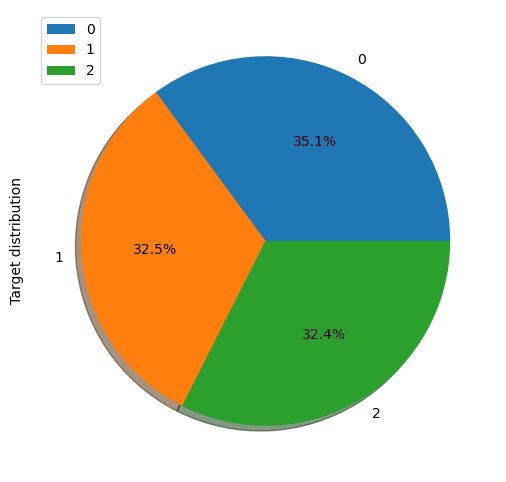

In [3]:
show_cluster_distrid(df,'Financial_solidity')

# I) Sampling

## 1) Undersampling

In [4]:
print(Counter(y))

undersample = RandomUnderSampler()
undersampled_X, undersampled_y = undersample.fit_resample(X_scaled, y.to_numpy())
print(Counter(undersampled_y))

undersampled_X=pd.DataFrame(undersampled_X,columns=df.drop('Financial_solidity', axis = 1).columns)
undersampled_y=pd.DataFrame(undersampled_y,columns=['Financial_solidity'])


Counter({0: 3510, 1: 3246, 2: 3244})
Counter({0: 3244, 1: 3244, 2: 3244})


## 2) OverSampling

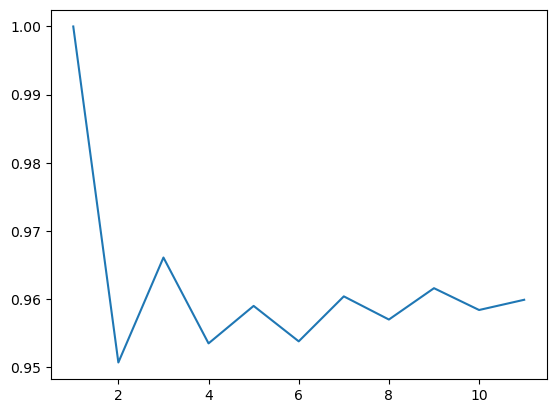

In [5]:
Knn_nighbert_params(X_scaled,y,12)

In [6]:

smote = SMOTE(sampling_strategy='auto',k_neighbors=1)
print(Counter(y))

oversampling_X, oversampling_y = smote.fit_resample(X,y)

print(Counter(oversampling_y))
oversampling_X=pd.DataFrame(oversampling_X,columns=df.drop('Financial_solidity', axis = 1).columns)
oversampling_y=pd.DataFrame(oversampling_y,columns=['Financial_solidity'])


Counter({0: 3510, 1: 3246, 2: 3244})
Counter({2: 3510, 0: 3510, 1: 3510})


## 3) Conclusion

* the distribution of the target classes is relatively balanced, undersampling using RandomUnderSampler might be a safer choice to avoid potential overfitting that could occur with SMOTE . 

In [7]:
liste_models_metrics=dict()

## II) Multi-Model Approach:

### 1) Decision Tree Classifier

{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 51), 'min_samples_split': range(2, 11), 'min_samples_leaf': range(1, 11), 'max_features': ['sqrt', 'log2', None]}


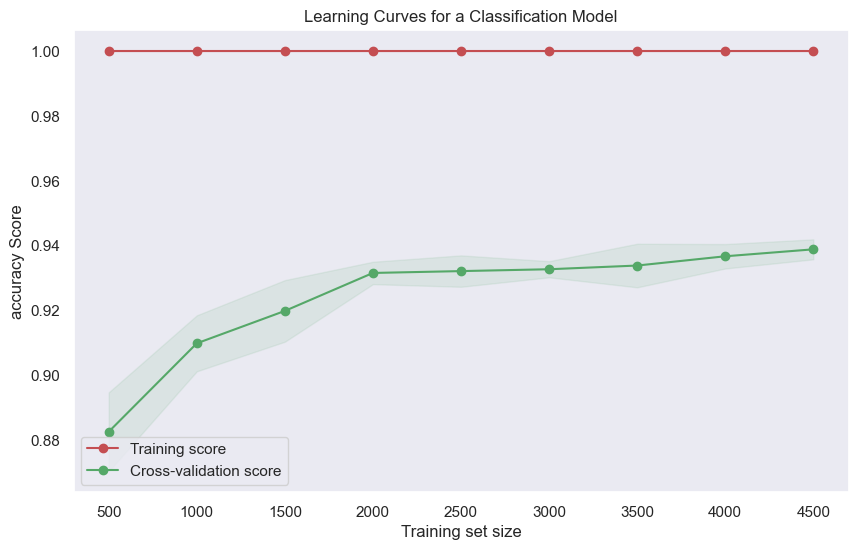

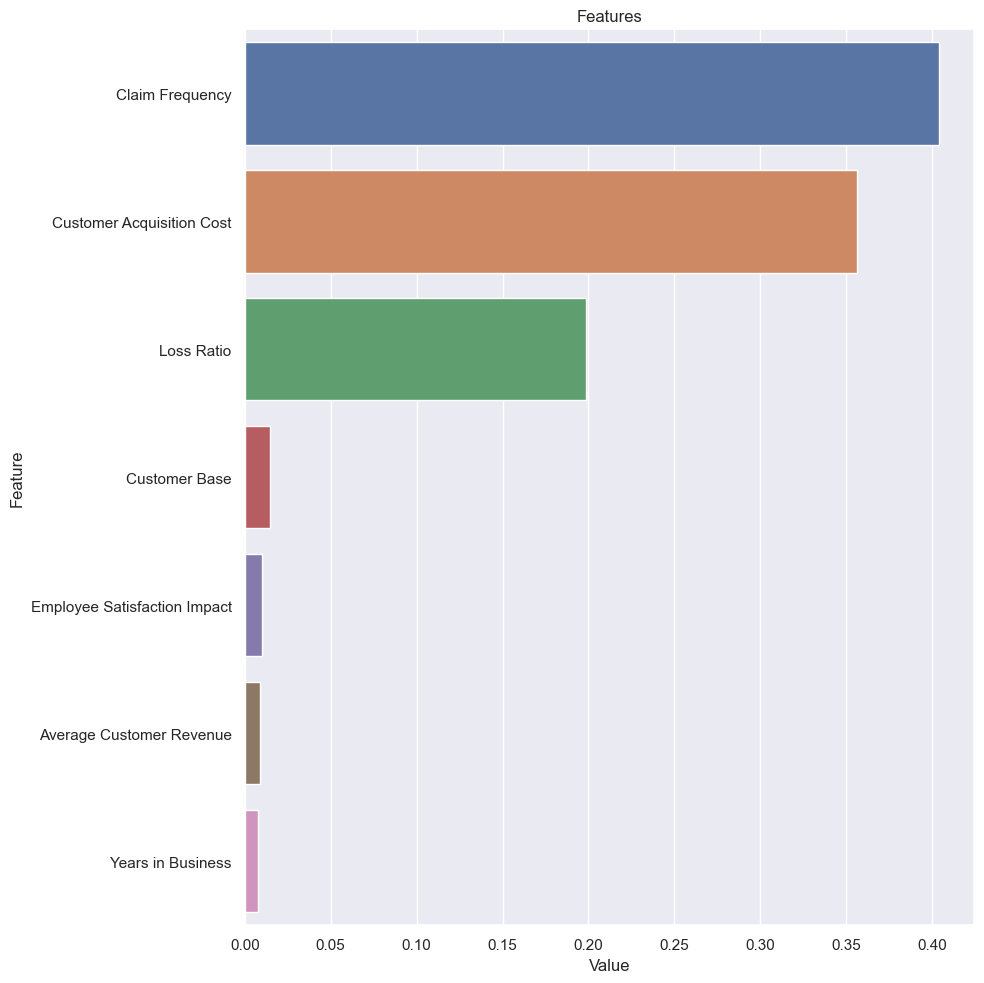

{'Accuracy': 0.9413333333333334, 'F1 Score': 0.9413790597106028, 'Precision': 0.9414921707955751, 'Recall': 0.9413333333333334, 'confusion_matrix': array([[955,  32,  30],
       [ 48, 935,  13],
       [ 31,  22, 934]], dtype=int64)}


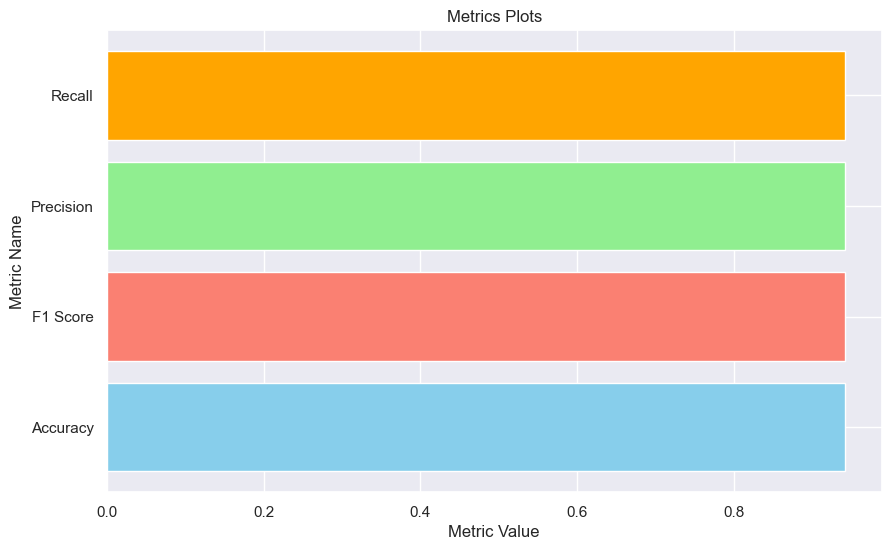

                    /*************************************\                   


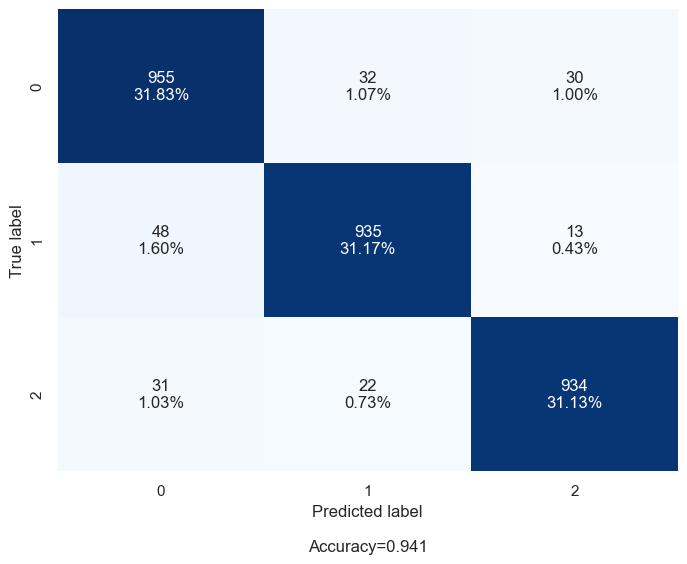

                    /*************************************\                   
Fitting 3 folds for each of 100 candidates, totalling 300 fits




*****************  Random  **************************

Best Params=  {'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 16, 'criterion': 'entropy'}


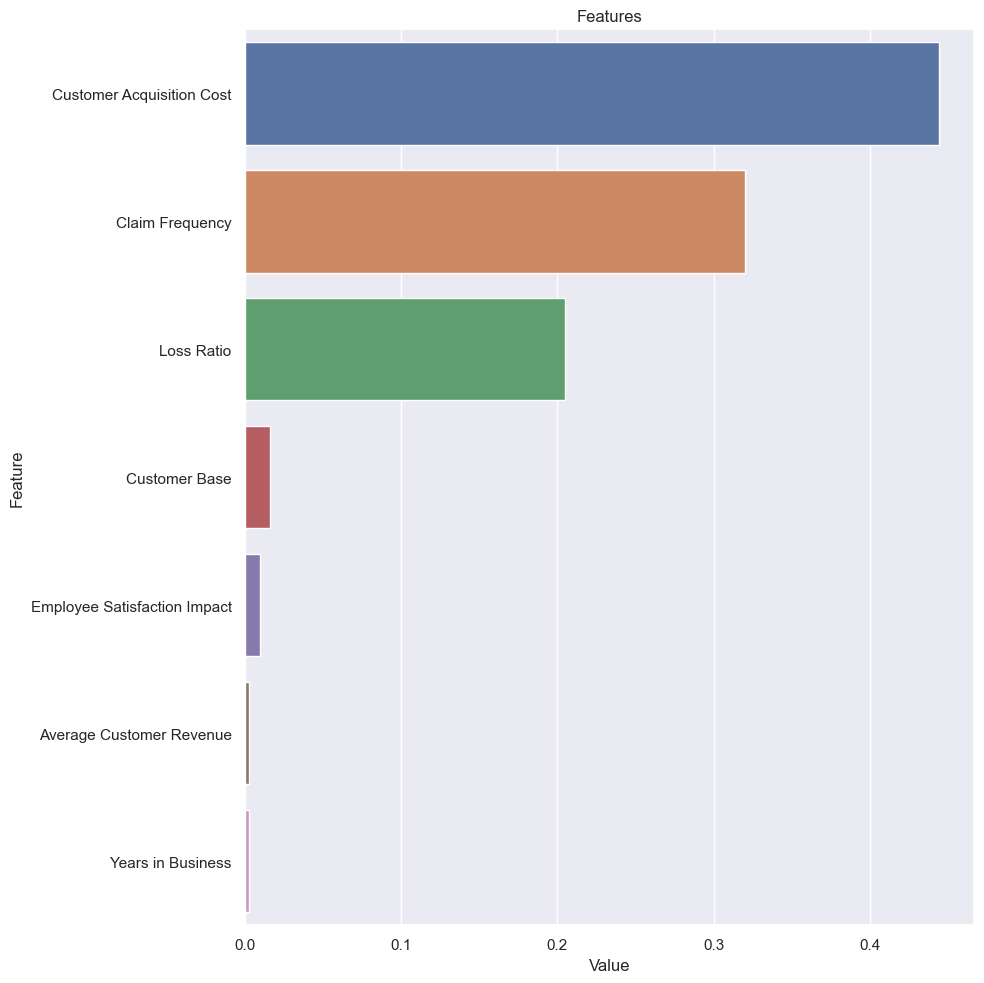

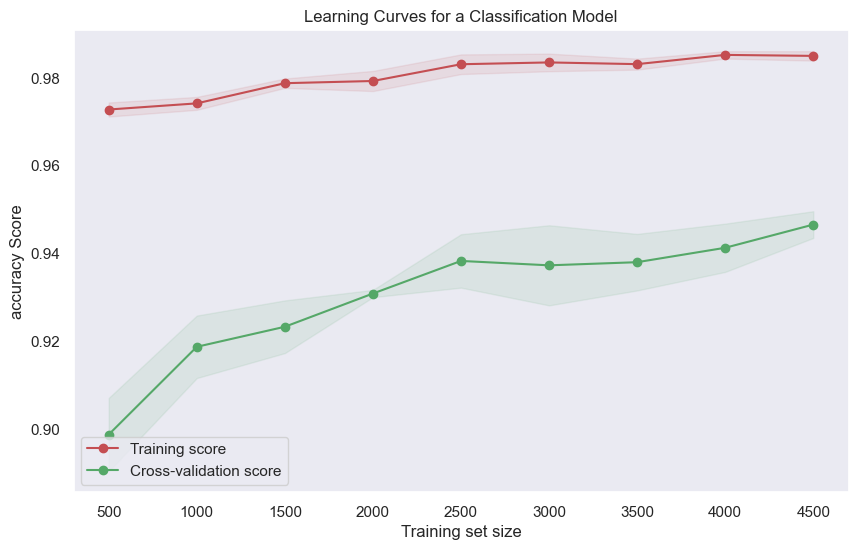

{'Accuracy': 0.949, 'F1 Score': 0.9490151118703194, 'Precision': 0.9490556252321231, 'Recall': 0.949, 'confusion_matrix': array([[953,  28,  36],
       [ 34, 949,  13],
       [ 33,   9, 945]], dtype=int64)}


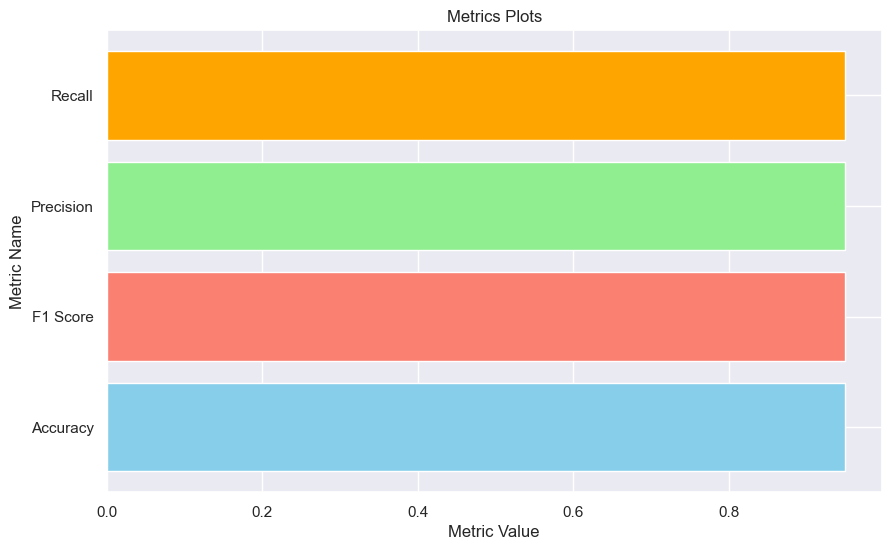

                    /*************************************\                   


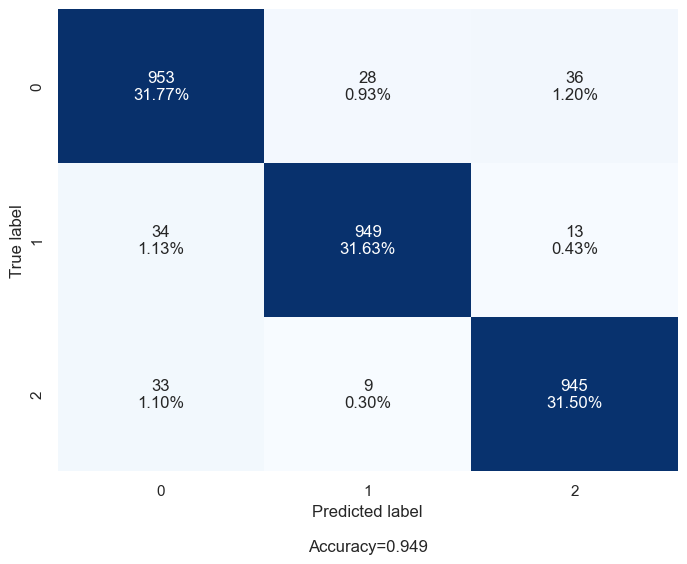

                    /*************************************\                   
                    /*************************************



In [31]:
random_grid  = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 51),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'max_features': ['sqrt', 'log2', None]
}

print(random_grid)
modeling(DecisionTreeClassifier,undersampled_X,undersampled_y,random_grid)

In [67]:
best_params = {'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 16, 'criterion': 'entropy'}

{'Accuracy': 0.9506849315068493, 'F1 Score': 0.9508246524703049, 'Precision': 0.9516022106503873, 'Recall': 0.9506849315068493, 'confusion_matrix': array([[923,  22,  14],
       [ 35, 886,   9],
       [ 48,  16, 967]], dtype=int64)}


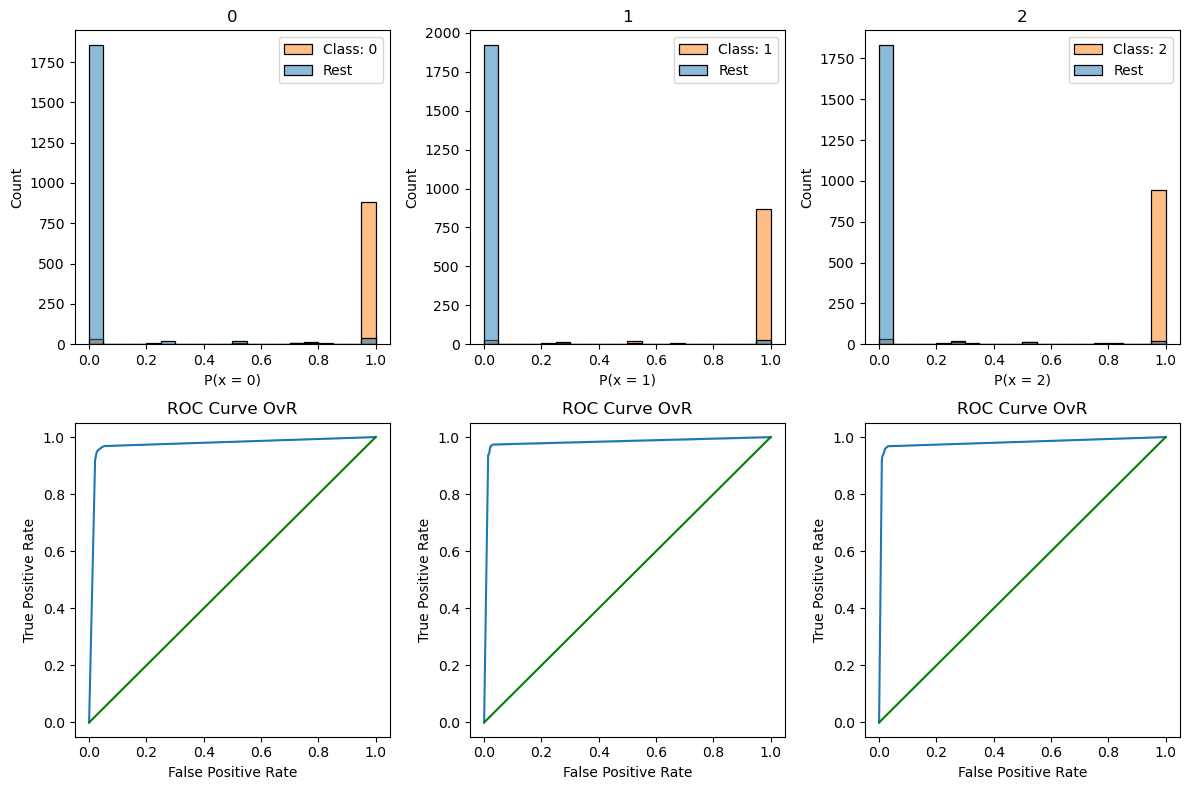

In [68]:
X_train, X_test, y_train, y_test = train_test_split(undersampled_X, undersampled_y, test_size=0.3)
best_model=DecisionTreeClassifier(**best_params)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
y_proba=best_model.predict_proba(X_test)
print(get_metrics(y_pred,y_test))
ROC_multi_class(best_model,y_pred,y_proba,X_test,y_test,'Financial_solidity')

In [69]:
# Add the Best Decisiontree model into a Model_list for the Final comparison
metric_dic=get_metrics(y_pred,y_test)
metric_dic.pop('confusion_matrix')
print(metric_dic)
if 'DecisionTree' not in liste_models_metrics.keys():
    liste_models_metrics['DecisionTree']=metric_dic

{'Accuracy': 0.9506849315068493, 'F1 Score': 0.9508246524703049, 'Precision': 0.9516022106503873, 'Recall': 0.9506849315068493}


{'DecisionTree': {'Accuracy': 0.9506849315068493,
  'F1 Score': 0.9508246524703049,
  'Precision': 0.9516022106503873,
  'Recall': 0.9506849315068493}}

### 2) Random Forest Classifier

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


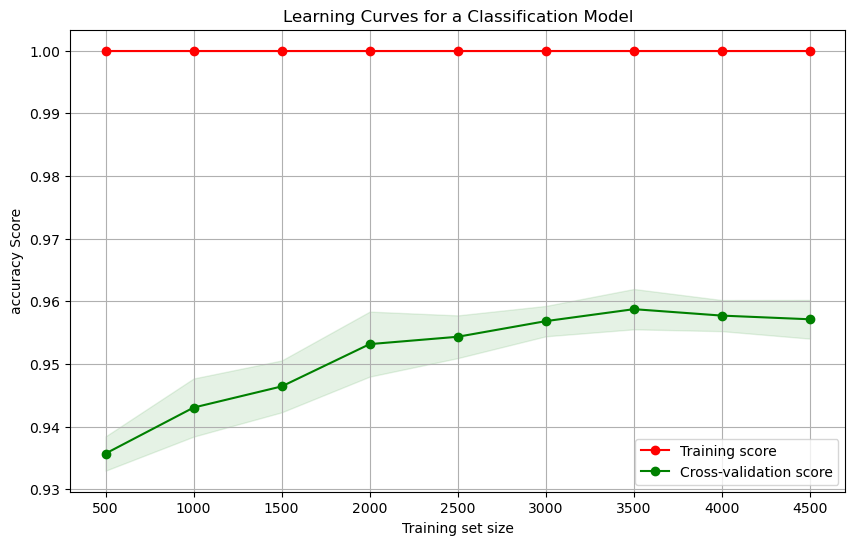

{'Accuracy': 0.9664383561643836, 'F1 Score': 0.9664308200736581, 'Precision': 0.9664401807208838, 'Recall': 0.9664383561643836, 'confusion_matrix': array([[906,  20,  19],
       [ 15, 977,  14],
       [ 16,  14, 939]], dtype=int64)}


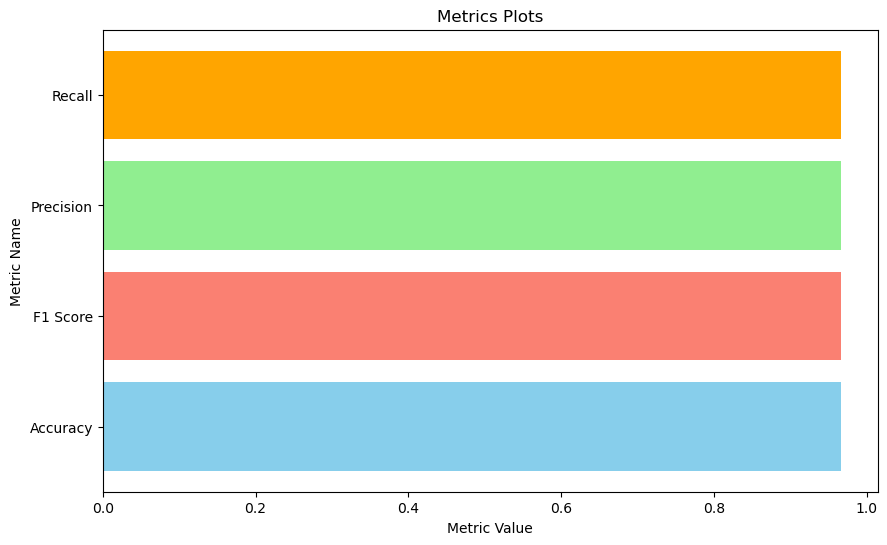

                    /*************************************\                   


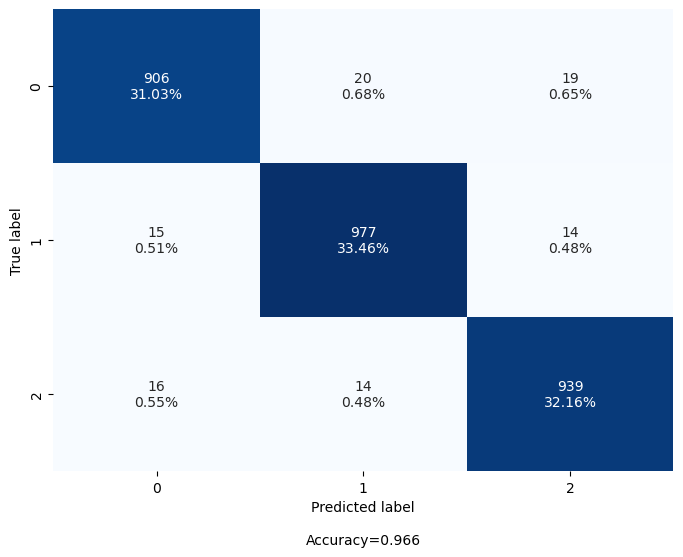

                    /*************************************\                   


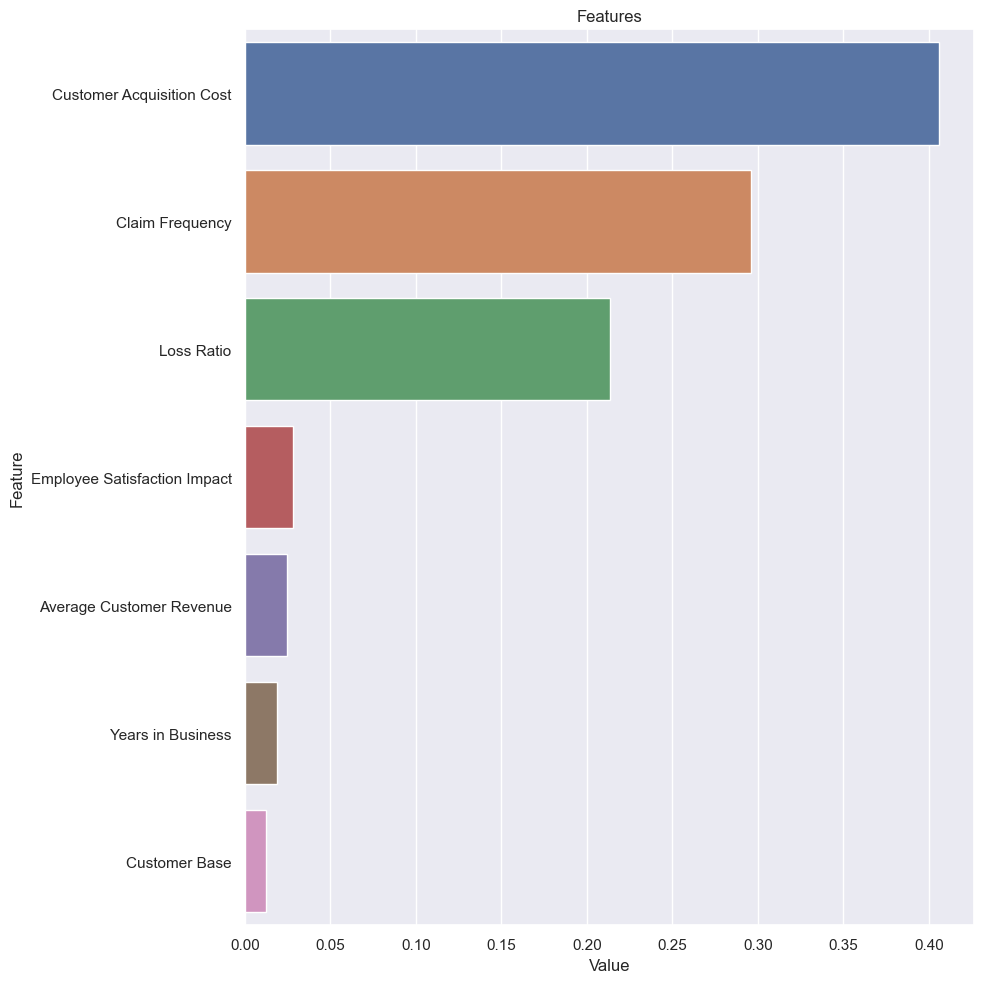

Fitting 3 folds for each of 100 candidates, totalling 300 fits
*****************  Random  **************************

Best Params=  {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 120, 'criterion': 'entropy'}


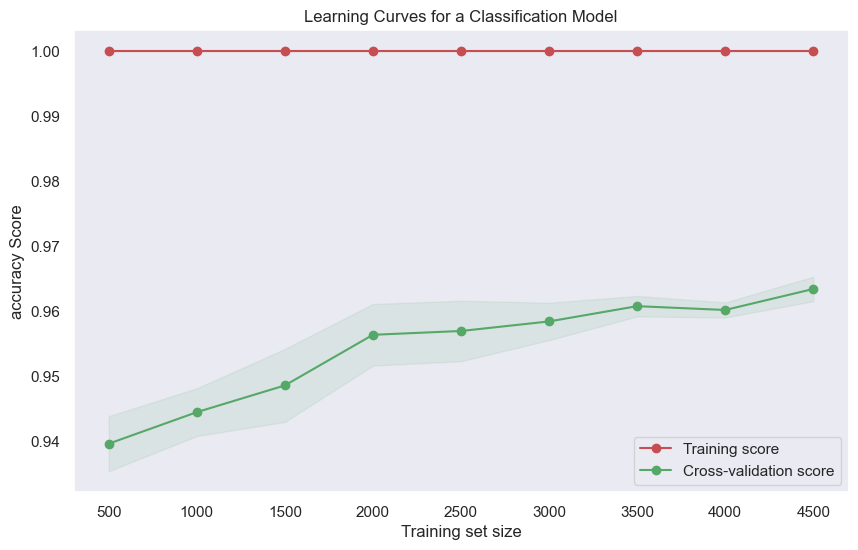

{'Accuracy': 0.9667808219178082, 'F1 Score': 0.966774892968027, 'Precision': 0.9667782999636858, 'Recall': 0.9667808219178082, 'confusion_matrix': array([[907,  18,  20],
       [ 14, 978,  14],
       [ 18,  13, 938]], dtype=int64)}


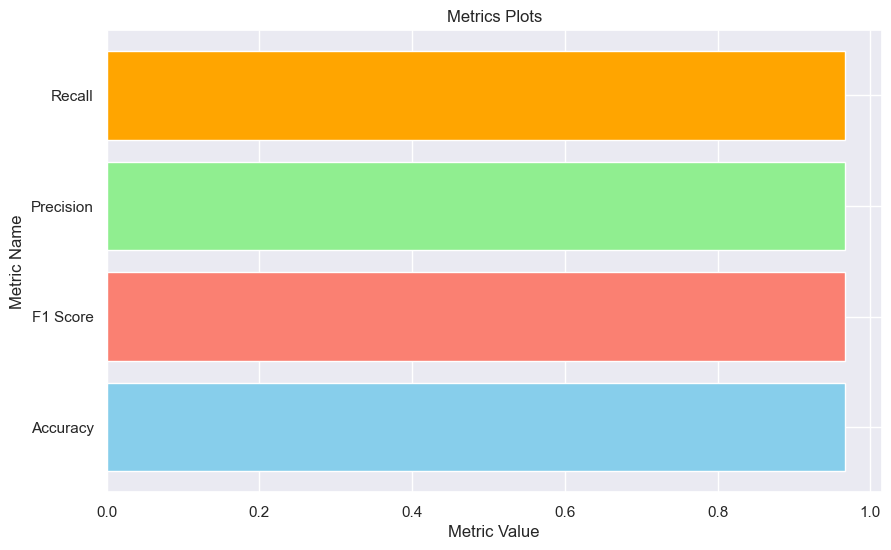

                    /*************************************\                   


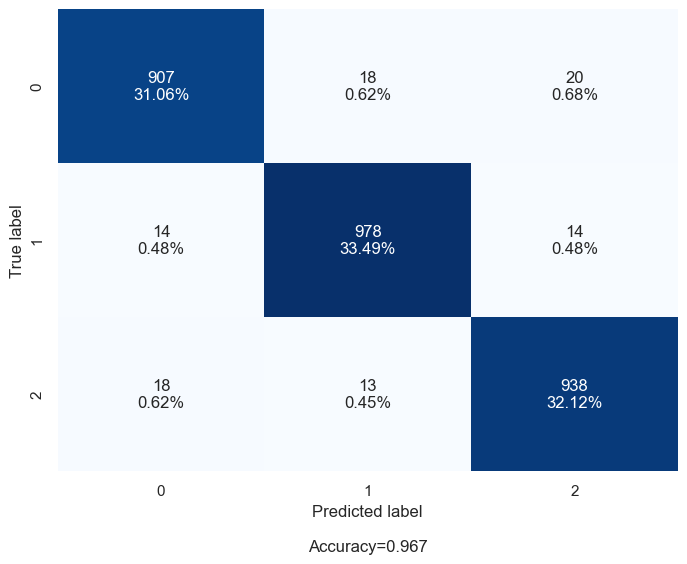

                    /*************************************\                   


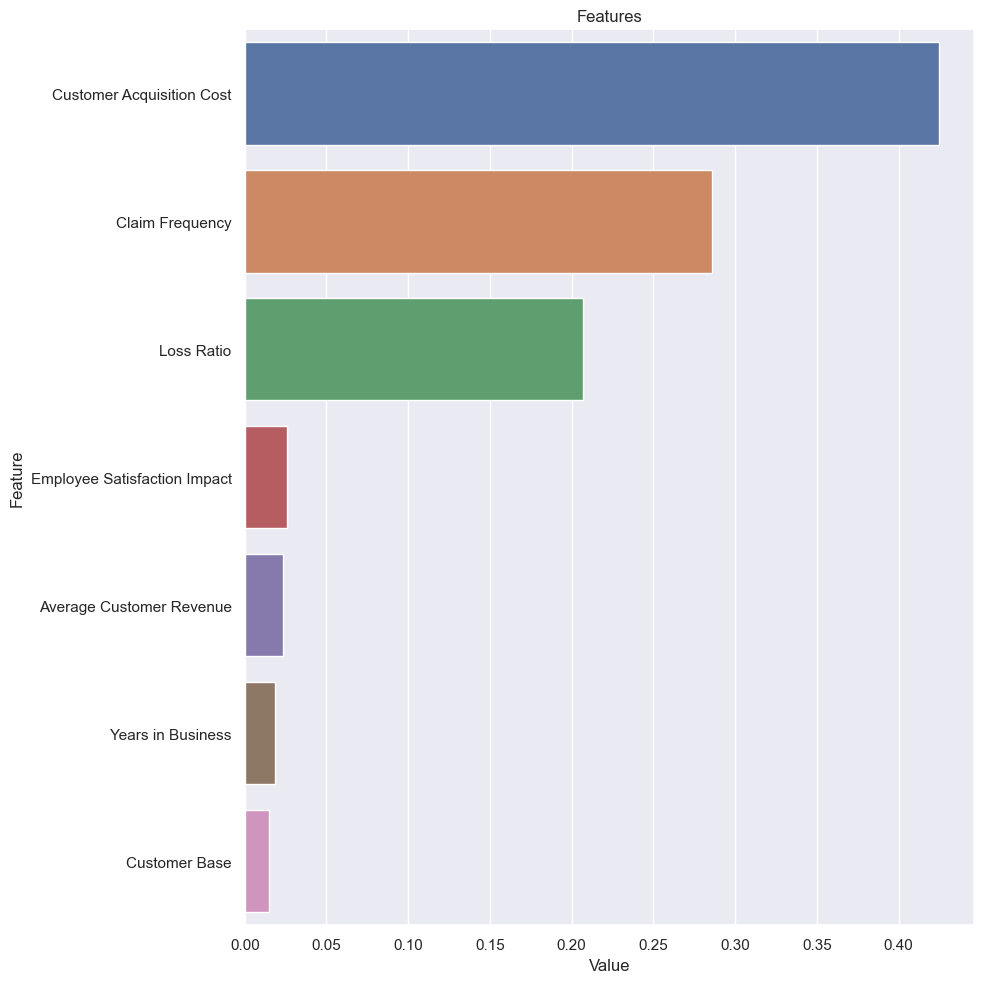

                    /*************************************\                   


In [4]:
 
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt','log2'],
               'max_depth': [int(x) for x in np.linspace(10, 1000,10)],
               'min_samples_split': [2, 5, 10,14],
               'min_samples_leaf': [1, 2, 4,6,8],
              'criterion':['entropy','gini']}
print(random_grid)
best_params=modeling(RandomForestClassifier,undersampled_X,undersampled_y,random_grid)

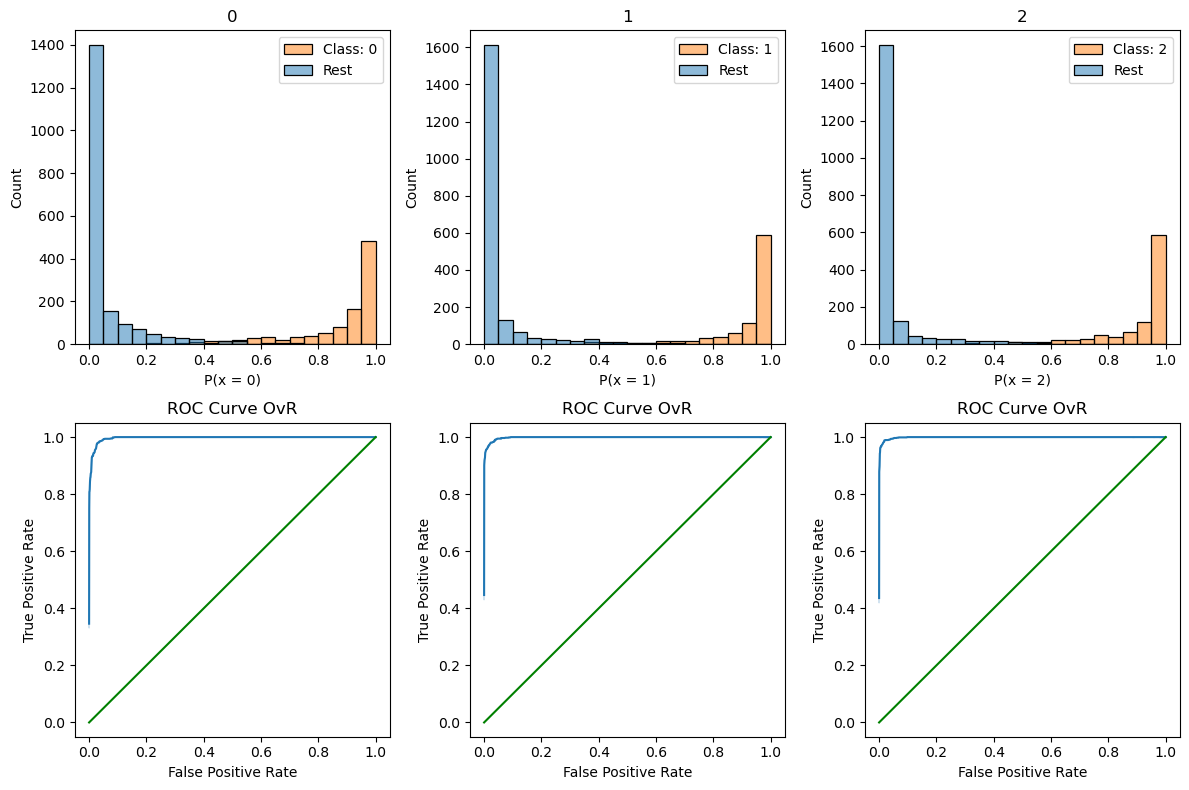

In [72]:
X_train, X_test, y_train, y_test = train_test_split(undersampled_X, undersampled_y, test_size=0.3)
best_model=RandomForestClassifier(**best_params)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
y_proba=best_model.predict_proba(X_test)
ROC_multi_class(best_model,y_pred,y_proba,X_test,y_test,'Financial_solidity')

In [73]:
metric_dic=get_metrics(y_pred,y_test)
metric_dic.pop('confusion_matrix')
print(metric_dic)
if 'RandomForestClassifier' not in liste_models_metrics.keys():
    liste_models_metrics['RandomForestClassifier']=metric_dic

{'Accuracy': 0.9643835616438357, 'F1 Score': 0.9643412517167966, 'Precision': 0.9643752065572323, 'Recall': 0.9643835616438357}


###    3) Gradient Boosting Classifier:

In [55]:
from sklearn.ensemble import GradientBoostingClassifier


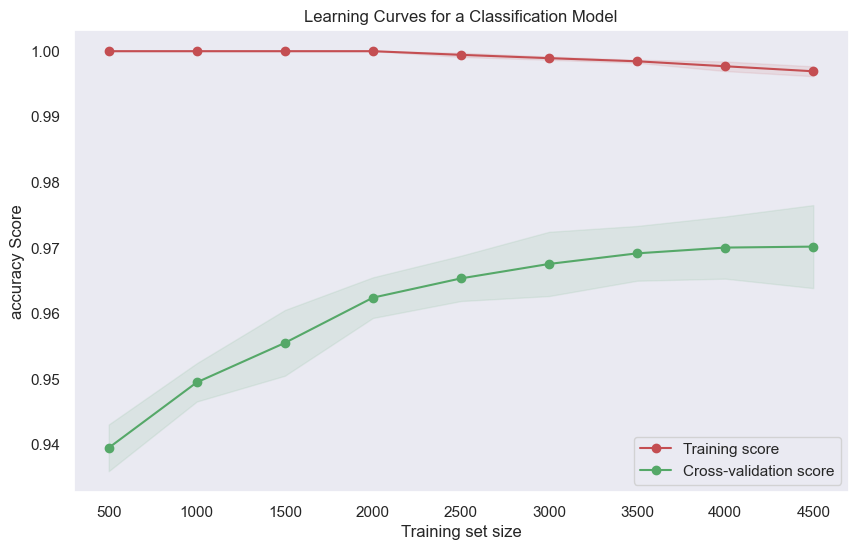

{'Accuracy': 0.977054794520548, 'F1 Score': 0.9770431969627976, 'Precision': 0.9771623229995499, 'Recall': 0.977054794520548, 'confusion_matrix': array([[955,  18,  17],
       [  8, 948,   4],
       [  7,  13, 950]], dtype=int64)}


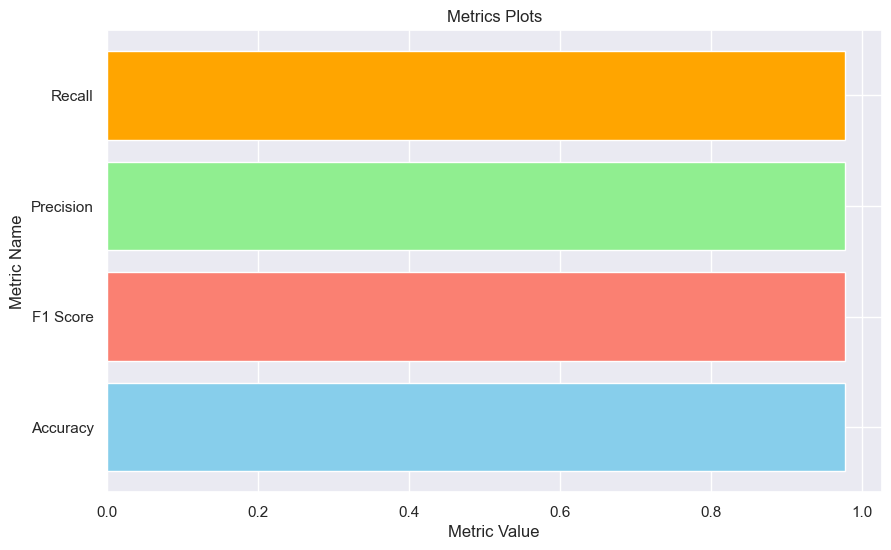

                    /*************************************\                   


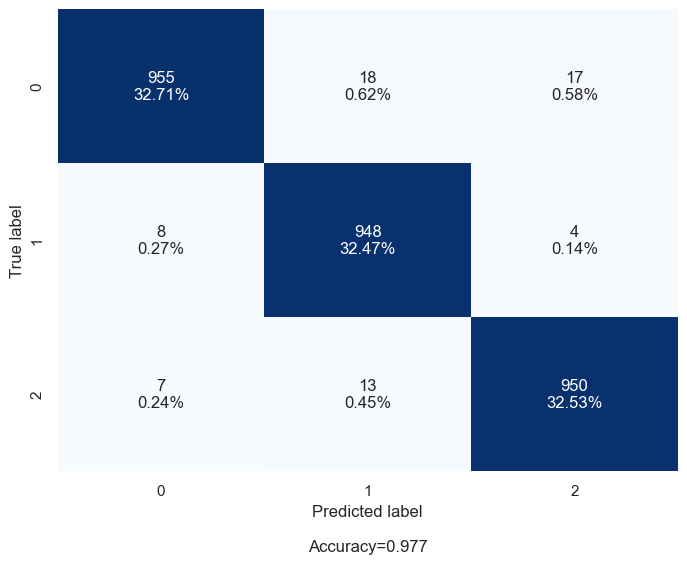

                    /*************************************\                   


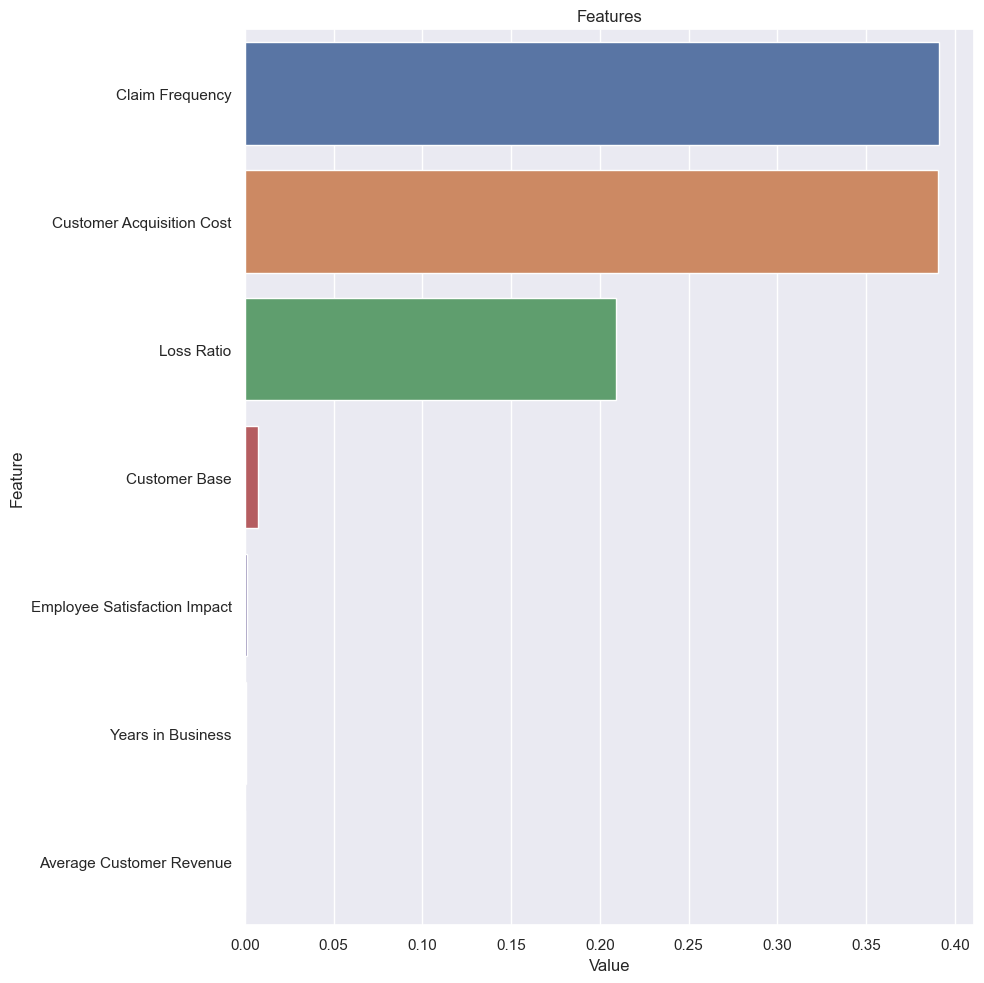

Fitting 3 folds for each of 100 candidates, totalling 300 fits
*****************  Random  **************************

Best Params=  {'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.1788888888888889}


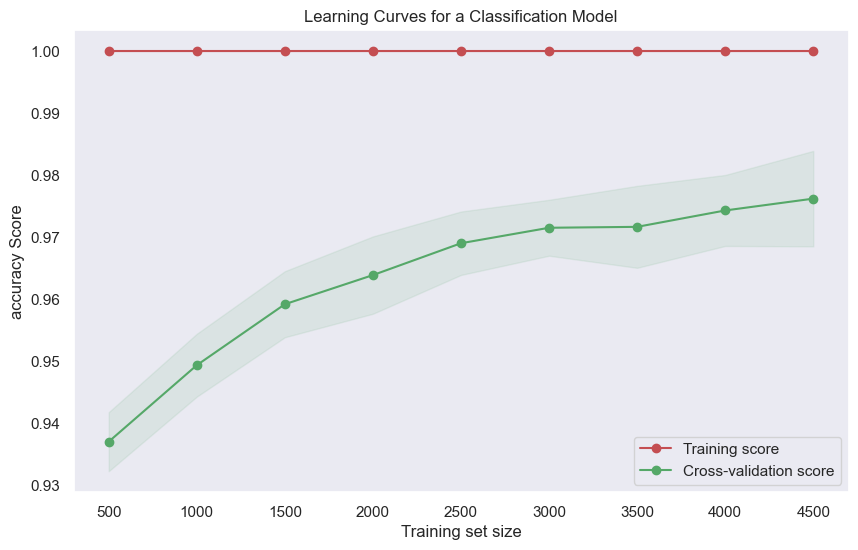

{'Accuracy': 0.9801369863013699, 'F1 Score': 0.9801349075187925, 'Precision': 0.980233226741094, 'Recall': 0.9801369863013699, 'confusion_matrix': array([[962,  14,  14],
       [  6, 950,   4],
       [  6,  14, 950]], dtype=int64)}


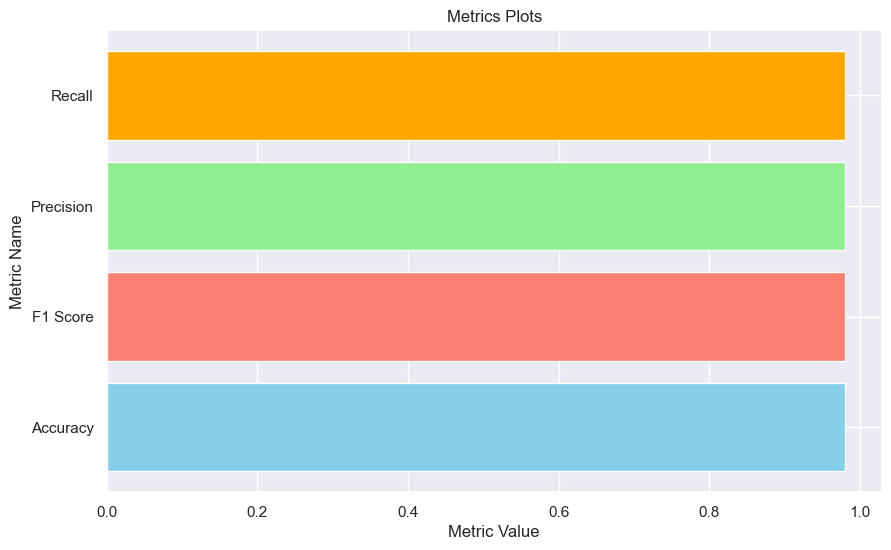

                    /*************************************\                   


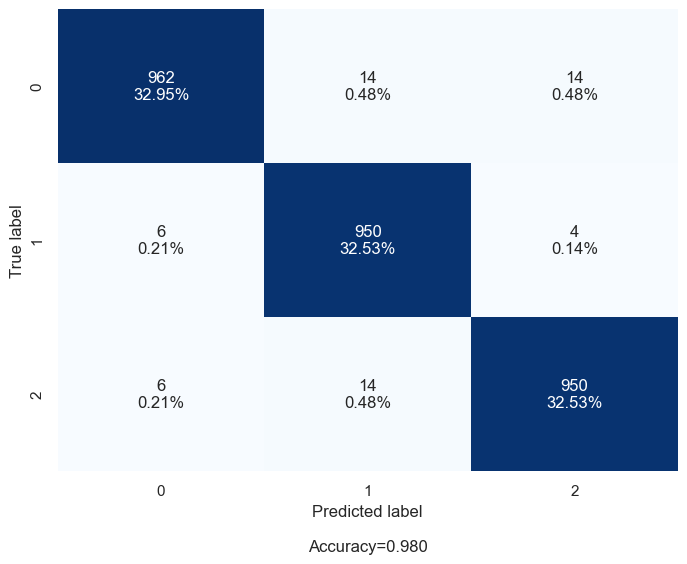

                    /*************************************\                   


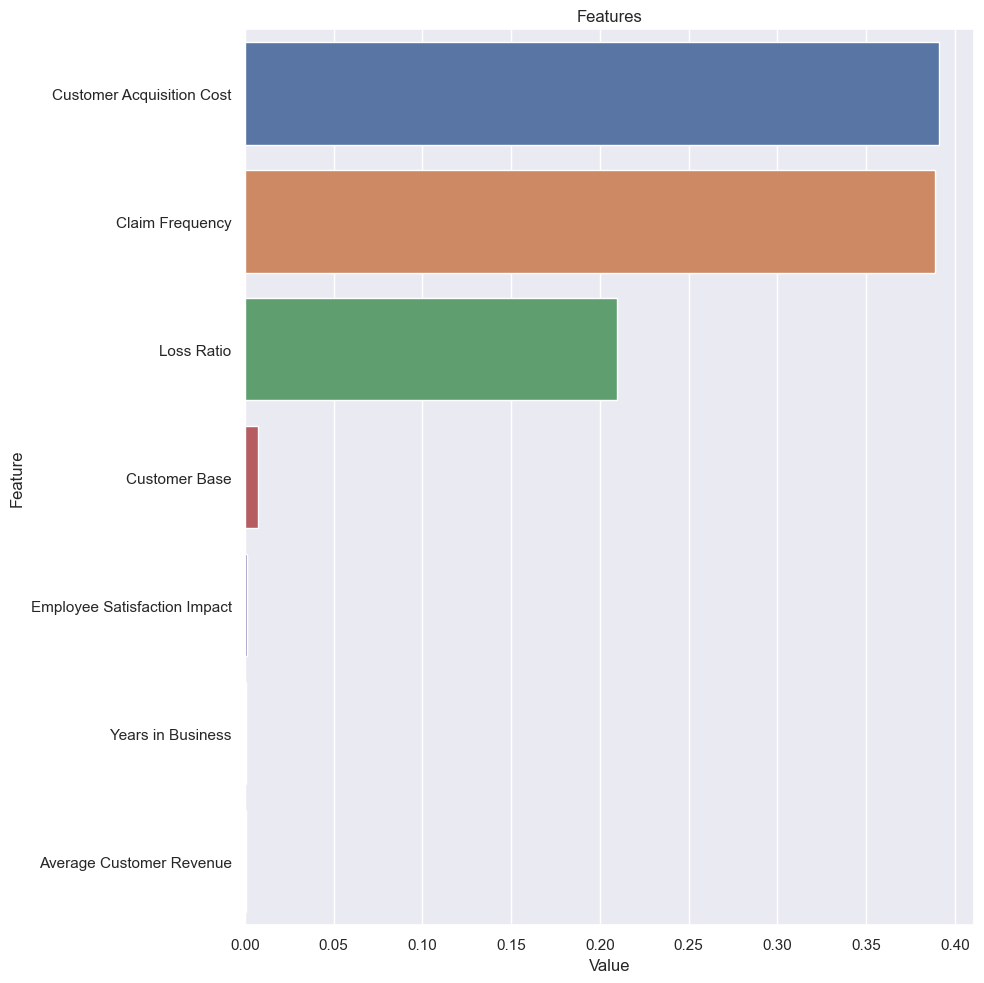

                    /*************************************\                   


In [5]:
random_grid = {
    'n_estimators': np.arange(50, 251, 50),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': np.arange(3, 8),
}
best_params=modeling(GradientBoostingClassifier,undersample_X,undersample_y,random_grid)

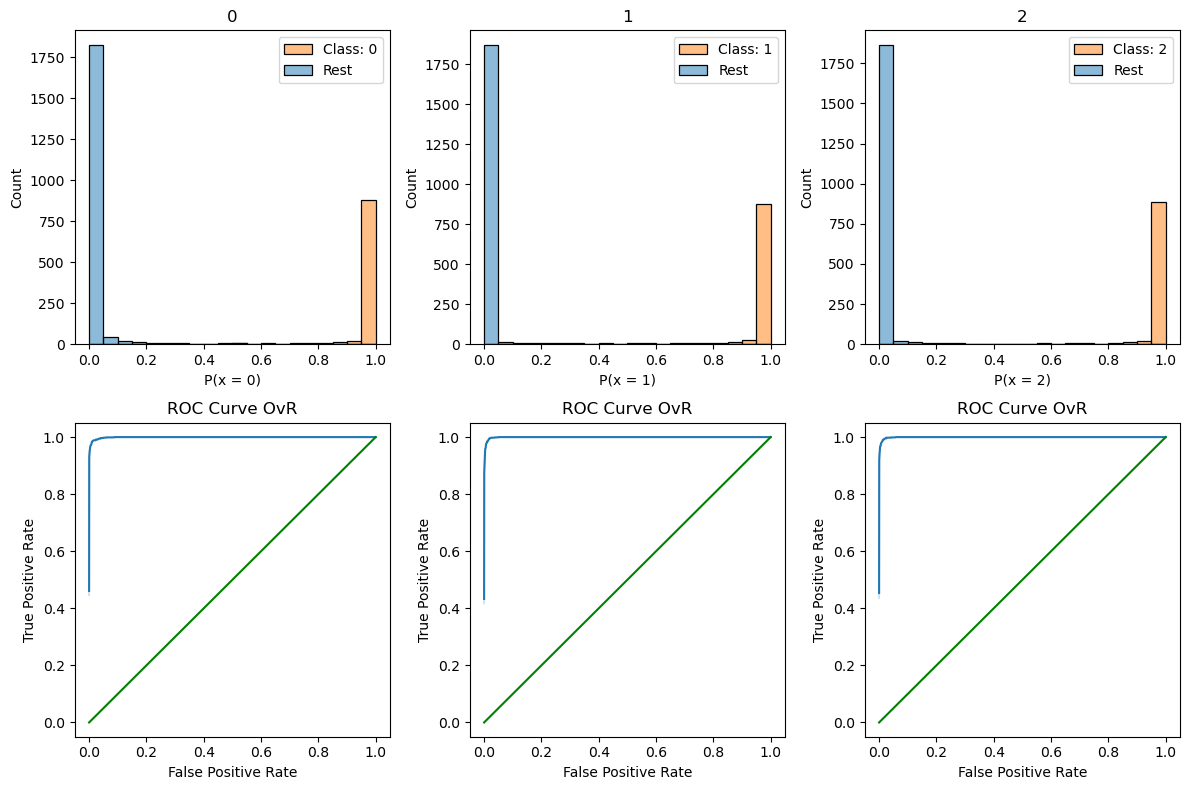

In [74]:

X_train, X_test, y_train, y_test = train_test_split(undersampled_X,undersampled_y, test_size=0.3)
best_model=GradientBoostingClassifier(**best_params)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
y_proba=best_model.predict_proba(X_test)
ROC_multi_class(best_model,y_pred,y_proba,X_test,y_test,'Financial_solidity')

In [75]:
metric_dic=get_metrics(y_pred,y_test)
metric_dic.pop('confusion_matrix')
if 'GradientBoostingClassifier' not in liste_models_metrics.keys():
    liste_models_metrics['GradientBoostingClassifier']=metric_dic

### 4) Support Vector Classifier (SVC)

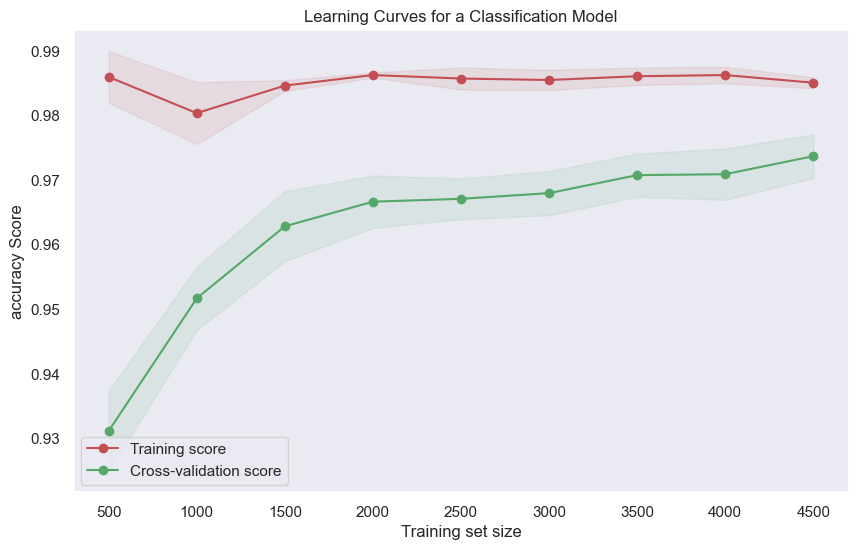

{'Accuracy': 0.9756849315068493, 'F1 Score': 0.9756734880451697, 'Precision': 0.9756788824884224, 'Recall': 0.9756849315068493, 'confusion_matrix': array([[953,   8,   6],
       [  8, 957,  20],
       [ 14,  15, 939]], dtype=int64)}


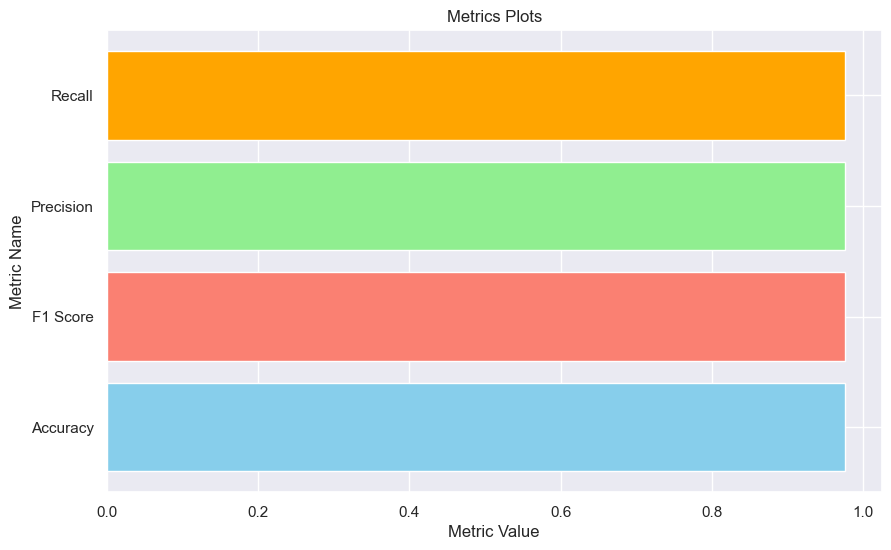

                    /*************************************\                   


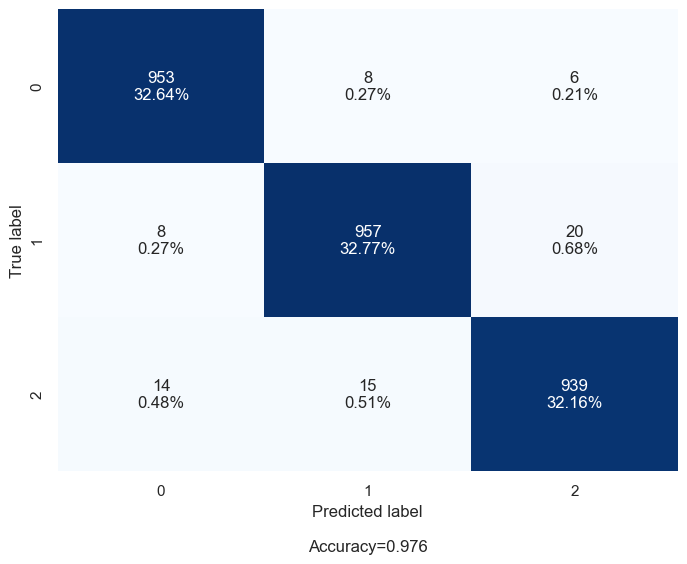

                    /*************************************\                   
Fitting 3 folds for each of 16 candidates, totalling 48 fits
*****************  Random  **************************

Best Params=  {'kernel': 'rbf', 'gamma': 0.01, 'C': 100}


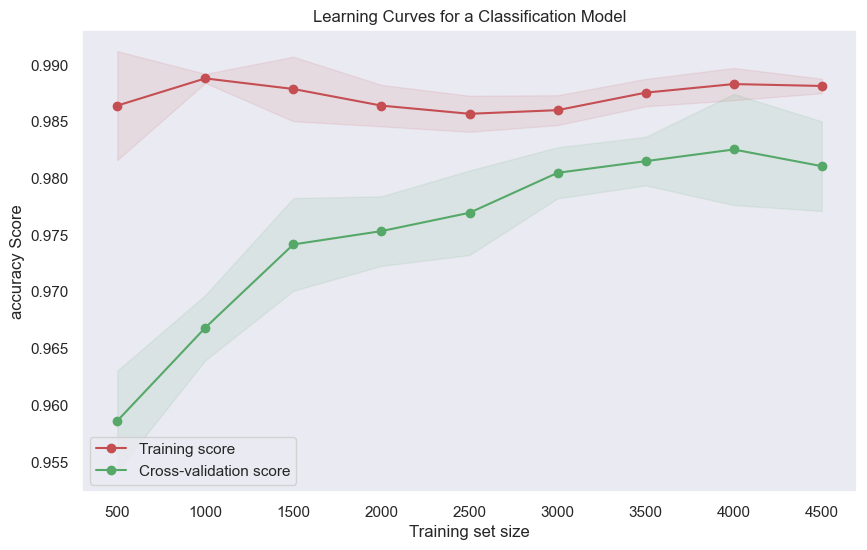

{'Accuracy': 0.9859589041095891, 'F1 Score': 0.9859567073120254, 'Precision': 0.9859555439502686, 'Recall': 0.9859589041095891, 'confusion_matrix': array([[960,   6,   1],
       [  4, 966,  15],
       [  4,  11, 953]], dtype=int64)}


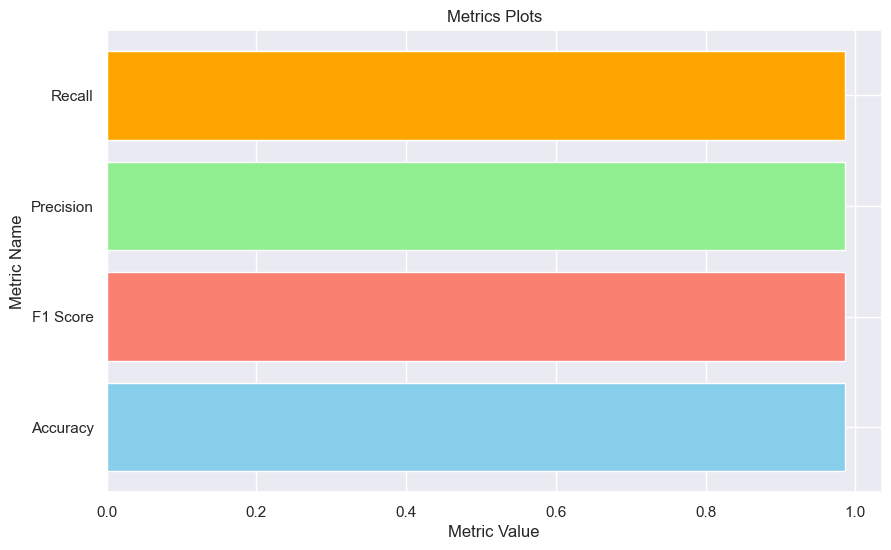

                    /*************************************\                   


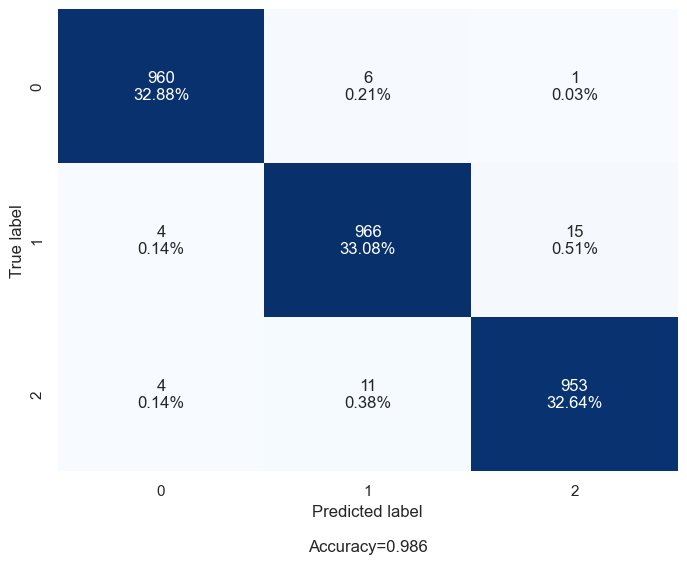

                    /*************************************\                   
                    /*************************************\ 


In [15]:
random_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],'kernel':['rbf']}

best_params=modeling(SVC,undersample_X,undersampled_y,random_grid,proba=False)

In [11]:

X_train, X_test, y_train, y_test = train_test_split(undersampled_X,undersampled_y, test_size=0.3)
SVC_model=SVC(**{'kernel': 'rbf', 'gamma': 0.01, 'C': 100})
SVC_model.fit(X_train,y_train)
y_pred=SVC_model.predict(X_test)
#ROC_multi_class(best_model,y_pred,y_proba,X_test,y_test,'Financial_solidity')

In [14]:
metric_dic=get_metrics(y_pred,y_test)
metric_dic.pop('confusion_matrix')
if 'SVM' not in liste_models_metrics.keys():
    liste_models_metrics['SVM']=metric_dic

# III) Model Comparison:

dict_values([0.9506849315068493, 0.9508246524703049, 0.9516022106503873, 0.9506849315068493])
dict_values([0.9643835616438357, 0.9643412517167966, 0.9643752065572323, 0.9643835616438357])
dict_values([0.9804794520547945, 0.9804804397039018, 0.9805257987654842, 0.9804794520547945])
dict_values([0.9849315068493151, 0.9849352398832503, 0.9849414059264748, 0.9849315068493151])


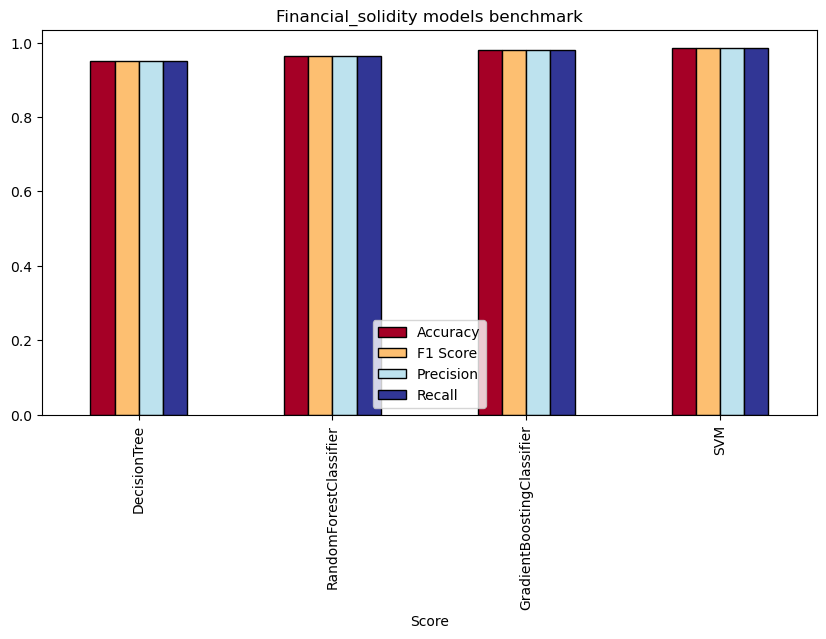

In [95]:
model_comparasion(list(liste_models_metrics.values()),list(liste_models_metrics.keys()),'Financial_solidity')

## Conclusion:

* Based on the comprehensive evaluation of multiple classification models, including Decision Trees, Random Forests, Gradient Boosting, and Support Vector Machines (SVM), it is evident that SVM emerges as the top-performing model across all evaluated metrics, including Accuracy, F1 Score, Precision, and Recall. SVM's superior performance can be attributed to its ability to effectively handle nonlinear relationships, robustness to outliers, balanced trade-off between bias and variance, effectiveness in high-dimensional feature spaces, and tunability of hyperparameters. By leveraging these strengths, SVM demonstrates robust and consistent performance across various datasets and can be considered a reliable choice for classification tasks. Therefore, based on the observed results and analysis, SVM stands out as the preferred model for the classification problem at hand, offering optimal performance and predictive accuracy.

# Save Model


In [8]:

X_train, X_test, y_train, y_test = train_test_split(undersampled_X,undersampled_y, test_size=0.3)
SVC_model=SVC(**{'kernel': 'rbf', 'gamma': 0.01, 'C': 100})
SVC_model.fit(X_train.to_numpy(),y_train.to_numpy())

SVC(C=100, gamma=0.01)

In [9]:
# Create new folder

directory = "Financial_s_Classification_models"
  
# Parent Directory path 
  
# Path 
models_directory=parent_dir+'\models'
path = os.path.join(models_directory, directory) 
try:
    os.mkdir(path)
except Exception as e:
    print(e.args[1])
    pass
print(path)

C:\Users\Haboubi\PFE2\classification\models\Financial_s_Classification_models


In [10]:
# Save Model
import joblib
joblib.dump(SVC_model, path+'\Financial_s_Classification_model.joblib')

['C:\\Users\\Haboubi\\PFE2\\classification\\models\\Financial_s_Classification_models\\Financial_s_Classification_model.joblib']

In [11]:
# Save Features
df.dtypes.to_pickle(path+'\Financial_s_Classification_Features.pkl')

In [12]:
# save Scaler
joblib.dump(scaled, path+'\Financial_s_Classification_scaler.joblib')


['C:\\Users\\Haboubi\\PFE2\\classification\\models\\Financial_s_Classification_models\\Financial_s_Classification_scaler.joblib']

## Add model/scaler into the table models in Postgres sql 

In [ ]:
import psycopg2
import pickle
db_config = {
    'dbname': 'postgres',
    'user': 'admin',
    'password': 'admin',
    'host': 'localhost',  
    'port': '5432'  
}



model_name="Financial_s_Classification_model"
scaler_name="Financial_s_Classification_scaler"
model_blob = pickle.dumps(SVC_model)
scaled_blob=pickle.dumps(scaled)

In [ ]:
try:
    # Connect to PostgreSQL
    conn = psycopg2.connect(**db_config)
    cursor = conn.cursor()

   
    # Insert the model into the table
    insert_model_query = """
    INSERT INTO model_storage (model_name, model_data)
    VALUES (%s, %s);
    """
    cursor.execute(insert_model_query, (model_name, model_blob))
    conn.commit()

    # Insert the scaler into the table
    insert_scaler_query = """
    INSERT INTO scalers_storage (scaled_name, scaled_data)
    VALUES (%s, %s);
    """
    cursor.execute(insert_scaler_query, (scaler_name, scaled_blob))
    conn.commit()
    print("scaler saved to PostgreSQL successfully!")

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    # Close the cursor and connection
    if cursor:
        cursor.close()
    if conn:
        conn.close()